# 머신러닝 물고기 크기 분류

In [30]:
import pandas as pd
import numpy as np
import random as rd

In [31]:
# 물고기의 가로 세로 데이터를 40개씩
# 길이는 25 ~ 41 사이의 랜덤한
# 무게는 240 ~ 950 사이의 랜덤한
rd.random()*16+25  # 25 ~ 41 
rd.random()*710+240  # 240 ~ 950 

bream_length, bream_weight = [],[]

for i in range(40):
    bream_length.append(round( rd.random()*16+25, 1))
    bream_weight.append(round(rd.random()*710+240, 1))


In [32]:
bream_length = sorted(bream_length)
bream_weight = sorted(bream_weight)

In [33]:
bream_length[:5], bream_weight[:5]

([25.1, 25.4, 25.4, 27.0, 27.3], [240.4, 243.8, 267.5, 274.0, 274.6])

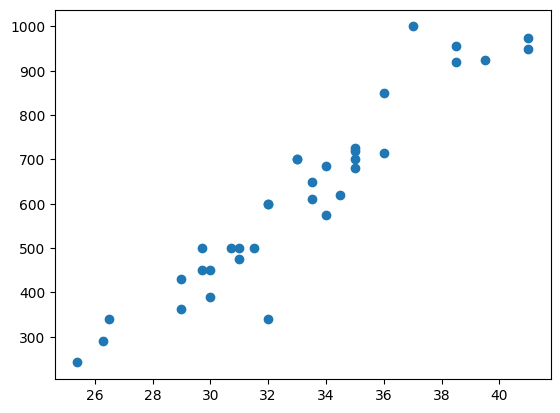

In [34]:
import matplotlib.pyplot as plt
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
plt.scatter(bream_length,bream_weight)
plt.show()

In [35]:
smelt_length, smelt_weight = [],[]

#0 ~ 1   9 ~ 15
# 6 ~ 20
for i in range(40):
    smelt_length.append(round( rd.random()*6+9, 1))
    smelt_weight.append(round(rd.random()*14+6, 1))

In [36]:
smelt_length = sorted(smelt_length)
smelt_weight = sorted(smelt_weight)

In [37]:
smelt_length[:5], smelt_weight[:5]

([9.3, 9.3, 9.3, 9.4, 9.5], [6.4, 7.5, 7.7, 8.2, 8.5])

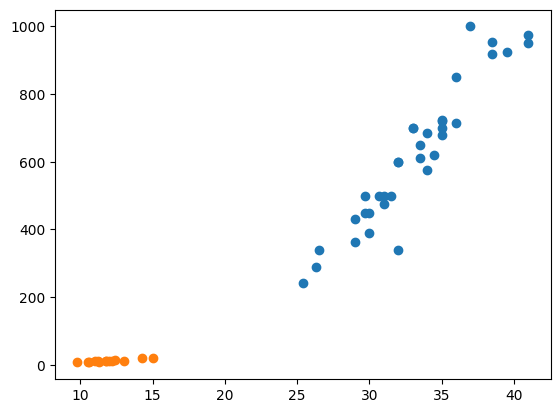

In [38]:
# 두개의 물고기를 하나의 그래프에 그려
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.show()

In [46]:
# 머신러닝으로 학습 - 판다스 형태로 만들어 준다.
# 리스트형태로 데이터
# bream 1  smelt 0
length = bream_length + smelt_length
weight = bream_weight + smelt_weight
target = [1]*len(bream_length) + [0]*len(smelt_length)

In [48]:
import pandas as pd
fish_df = pd.DataFrame({'length':length, 'weight':weight,'target':target})

In [53]:
fish_data =  fish_df.drop(columns=['target'])
fish_target = fish_df.drop(columns=['length','weight'])
fish_data.shape, fish_target.shape

((49, 2), (49, 1))

In [55]:
from sklearn.neighbors import KNeighborsClassifier
kn =  KNeighborsClassifier()
kn.fit(fish_data,fish_target)

C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [56]:
kn.score(fish_data,fish_target)

1.0

In [66]:
if kn.predict([[30,600]])[0] == 1:
    print("bream")
else:
    print("smel")

bream


C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


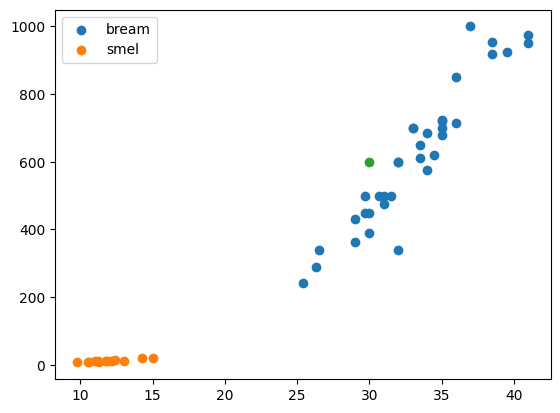

In [64]:
plt.scatter(bream_length,bream_weight,label = "bream")
plt.scatter(smelt_length,smelt_weight,label = 'smel')
plt.scatter(30,600)
plt.legend()
plt.show()

In [67]:
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data,fish_target)
kn49.score(fish_data,fish_target)

C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7142857142857143

In [68]:
35 /  49

0.7142857142857143

In [69]:
# k 최근접 이웃알고리즘--- 거리기반의 분류 모델
# n_neighbors의 개수는 판단하려는 데이터에서 가장 가까운 이웃들의 수... 그 이웃들의 속해있는 집합으로 판단
# score : 정확도... accuracy   맞힌개수 / 전체개수

In [70]:
# Q 다음이 설명하는것
# 데이터를 표현하는 하나의 성질.. 국가데이터... gdp 인구수 면적  이런성질
# 1. 특질  2. 개성 3.요소 4. 특성

# Q2 가까운 이웃을 참고해서 정답을 예측하는 머신러닝 알고리즘  : k-최근접이웃

# Q3 사이킷런 모델에서 훈련할때 사용하는 메서드 : fit
# Q4 사이킷런 모델에서  예측할대 사용하는 메서드: predict
# Q5 사이킷런 모델에서  평가(정확성)할때 사용하는 메서드: score